In [1]:
from typeguard.importhook import install_import_hook
install_import_hook('repl')

In [1]:
%autoreload 2

In [2]:
from policies import MinimaxPolicy, RandPolicy, AlphaBeta, MCTS
import game
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [5]:
def mcts_game():
    players = [MCTS(0, limit=350), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=10, log=True)
    sim.go()
    return sim

In [6]:
mcts_game()

ValueError: Two pieces at the same position

In [37]:
game.decode(game.default_start_state)

array([[1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [3, 0],
       [1, 7],
       [2, 7],
       [3, 7],
       [4, 7],
       [5, 7],
       [3, 7]])

In [7]:
pdb.pm()

> /home/sam/classes/planning/hw2/game.py(166)lub()
    164         return a
    165     if a.norm == b.norm:
--> 166         raise ValueError("Two pieces at the same position")
    167     return b
    168 

ipdb> print(a)
PotentialMove(norm=1, player=0, y=7)
ipdb> print(b)
PotentialMove(norm=1, player=1, y=7)
ipdb> u
> /home/sam/classes/planning/hw2/game.py(252)pass_actions()
    250             newmove = PotentialMove(n, p, y)
    251             if u in moves:
--> 252                 moves[u] = lub(moves[u], newmove)
    253             else:
    254                 moves[u] = newmove

ipdb> u
> /home/sam/classes/planning/hw2/game.py(222)ball_actions_from()
    220         while not balls.empty():
    221             x = balls.get()
--> 222             for yy in Rules.pass_actions(st, player_ix, x, passes):
    223                 passes.add(yy)
    224                 balls.put(decode(yy))

ipdb> print(st)
ipdb> from pmextract import extract
ipdb> extract()
*** RuntimeError: Copied

In [25]:
units

[(-1, -1), (1, -1), (-1, -1)]

In [26]:
vecs

array([[-1, -1],
       [ 0,  0],
       [ 2, -2],
       [ 3, -2],
       [ 4, -2],
       [ 2, -1],
       [-1, -1],
       [ 2,  5],
       [ 3,  5],
       [ 4,  5]])

In [36]:
st.state

array([ 7, 15,  3,  4,  5,  3, 10,  7, 52, 53, 54, 52])

In [33]:
st.stated[st.block_locs, :]

array([[0, 1],
       [1, 2],
       [3, 0],
       [4, 0],
       [5, 0],
       [3, 1],
       [0, 1],
       [3, 7],
       [4, 7],
       [5, 7]])

In [23]:
list(game.Rules.pass_actions(st, player_ix, x, passes))

ValueError: Two pieces at the same position

In [21]:
moves

{(-1, -1): PotentialMove(norm=1, player=0, y=7),
 (1, -1): PotentialMove(norm=2, player=0, y=3)}

<generator object Rules.pass_actions.<locals>.<genexpr> at 0x7f683d465ee0>

In [16]:
x

array([1, 2])

We should able to pass to 01 and 30. That's it.  

In [17]:
moves

NameError: name 'moves' is not defined

In [15]:
st.state

array([ 7, 15,  3,  4,  5,  3, 10,  7, 52, 53, 54, 52])

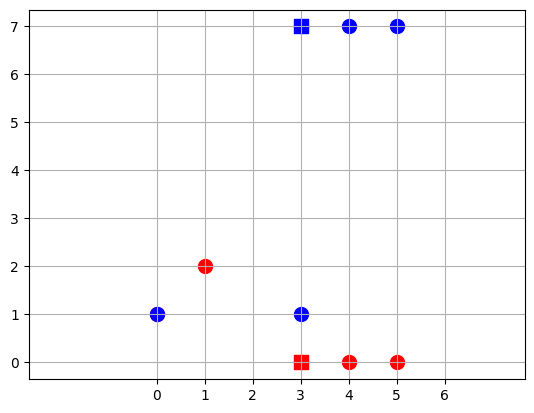

In [9]:
util.plotstate(st.stated)

In [10]:
st.state

array([ 7, 15,  3,  4,  5,  3, 10,  7, 52, 53, 54, 52])

In [8]:
import util

In [16]:
def rand_game():
    players = [RandPolicy(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=800)
    sim.run()
    return sim

In [17]:
rand_games = [rand_game() for _ in range(50)]

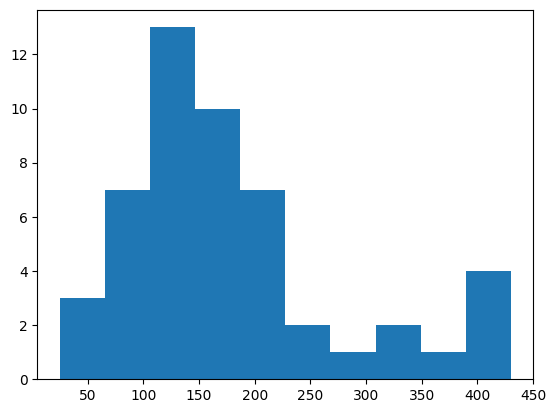

In [22]:
plt.hist([g.current_round for g in rand_games]);

In [27]:
np.mean([g.winner() for g in rand_games])

0.62

In [30]:
def minimax_rand():
    players = [MinimaxPolicy(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=700)
    sim.run()
    return sim

In [31]:
mm_games = [minimax_rand() for _ in range(20)]

In [32]:
np.mean([g.winner() for g in mm_games])

0.1

So Minimax, even with depth 3 and no hueristic, is already way better than random!

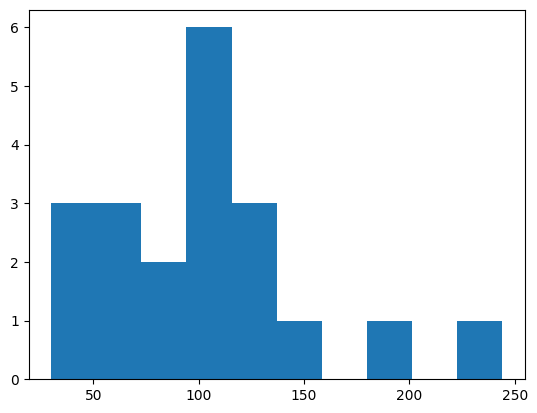

In [33]:
plt.hist([g.current_round for g in mm_games]);

It seems like the games are ending faster too

In [13]:
def ab_rand():
    players = [AlphaBeta(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=700)
    sim.run()
    return sim

In [14]:
ab_games = [ab_rand() for _ in range(20)]

In [15]:
np.mean([g.winner() for g in ab_games])

0.25

As expected, we do even better with Alpha Beta pruning.

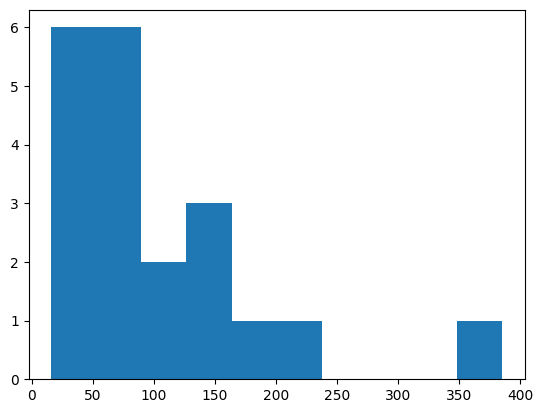

In [16]:
plt.hist([g.current_round for g in ab_games]);

Hm: but the games are taking longer? Could also be sample quirks. 20 games isn't much of a sample. 

In [24]:
def minimax_game():
    players = [MinimaxPolicy(0), MinimaxPolicy(1)]
    sim = game.GameSimulator(players, n_steps=1000)
    sim.run()